# Simulate Amazon stock prices
Using historical data from Yahoo for 2014-10-01 to 2016-09-30, we computed historical returns in a Google sheet, and now we will do a Monte Carlo simulation using the standard  deviation of returns.

Populating the interactive namespace from numpy and matplotlib


(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00085193,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([-25244.32819081, -24070.51802807, -22896.70786533, -21722.89770259,
        -20549.08753984, -19375.2773771 , -18201.46721436, -17027.65705162,
        -15853.84688888, -14680.03672614, -13506.2265634 , -12332.41640066,
        -11158.60623792,  -9984.79607517

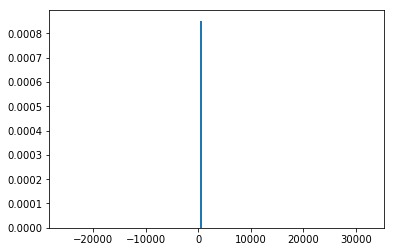

In [11]:
import numpy as np
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

current_price  = 837.31
sigma_one_day = 0.1

#for Monte Carlo, we generate random log returns, apply to the 
#current price to find simulated future prices.
num_trials = 1000
mean_daily_return = 0
simulated_log_returns = np.random.normal(mean_daily_return,sigma_one_day,num_trials)
simulated_prices = [current_price*np.exp(ret) 
                    for ret in simulated_log_returns]

num_shares_AMZN = 100
profit_and_loss = [num_shares_AMZN *(price-current_price)
                  for  price in simulated_prices]

var_quantile = 0.05
VaR = -sorted(profit_and_loss)[int(var_quantile*num_trials)]
print(VaR)

VaR_excession = [loss for loss in profit_and_loss if loss < -VaR]


simulated_prices
np.std(simulated_prices)
price_sigma = np.std(simulated_prices)
plt.hist(simulated_prices,bins = 50,normed = True,
        align = 'left',rwidth = 0.3,
         range = (min(profit_and_loss),max(profit_and_loss)))

